# IIoT Minimal Simulation
This notebook consolidates the sensor, monitor, and visualization logic so it can be run directly in Google Colab.

In [16]:
!pip install matplotlib

## Sensor Definition

In [24]:
import random
import time

class Sensor:
    """Simulates a basic sensor producing measurements."""
    def __init__(self, name: str, unit: str, min_value: float, max_value: float, interval: float = 1.0):
        self.name = name
        self.unit = unit
        self.min_value = min_value
        self.max_value = max_value
        self.interval = interval
        self.value = None
        self.last_time = None

    def read(self):
        """Generate a new measurement."""
        self.value = random.uniform(self.min_value, self.max_value)
        self.last_time = time.time()
        return self.value


## Monitor Definition

In [25]:
import time
from collections import defaultdict
from typing import List, Tuple

#from .sensor import Sensor

class Monitor:
    """Collects data from sensors at fixed intervals."""
    def __init__(self, sensors: List[Sensor]):
        self.sensors = sensors
        self.data = defaultdict(list)  # sensor name -> list of (timestamp, value)

    def sample(self):
        """Collect a sample from each sensor."""
        for sensor in self.sensors:
            value = sensor.read()
            self.data[sensor.name].append((sensor.last_time, value))

    def run(self, duration: float, interval: float = 1.0):
        """Run sampling for a duration in seconds."""
        end_time = time.time() + duration
        while time.time() < end_time:
            self.sample()
            time.sleep(interval)
        return self.data


## Visualization and Simulation

In [26]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time # Import time for FuncAnimation example

# Sensor and Monitor classes are expected to be defined above

def main():
    sensors = [
        Sensor("Water Level", "m", 0.0, 10.0),
        Sensor("Flow Rate", "m3/s", 0.0, 5.0),
        Sensor("pH", "", 6.0, 9.0),
    ]
    monitor = Monitor(sensors)

    # Initialize plot for animation
    fig, ax = plt.subplots()
    lines = {sensor.name: ax.plot([], [], label=f"{sensor.name} ({sensor.unit})")[0] for sensor in sensors}
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Value")
    ax.set_title("Sensor Readings Over Time")
    ax.legend()
    ax.grid(True)

    def update(frame):
        monitor.sample()
        for sensor in sensors:
            # Get the latest data for the sensor
            times, values = zip(*monitor.data[sensor.name]) if monitor.data[sensor.name] else ([], [])
            if times:
                # Adjust times to be relative to the start time if needed
                start_time = monitor.data[sensors[0].name][0][0] if monitor.data[sensors[0].name] else time.time() # Use first sensor's start time
                relative_times = [t - start_time for t in times]
                lines[sensor.name].set_data(relative_times, values)
                ax.set_xlim(0, max(relative_times) if relative_times else 1) # Adjust x-axis limit
                ax.set_ylim(min(values) - 1 if values else 0, max(values) + 1 if values else 10) # Adjust y-axis limit

        return list(lines.values()) # Return the lines that were updated

    # Create the animation
    # We will run the animation for a fixed number of frames or duration implicitly
    # by letting it sample in the update function.
    # For saving, we might need a fixed number of frames. Let's aim for 60 frames (60 seconds at 1 sec interval).
    num_frames = 60
    ani = FuncAnimation(fig, update, frames=num_frames, interval=1000, blit=True, repeat=False)

    # Save the animation as a GIF
    print("Saving animation as 'sensor_readings.gif'...")
    try:
        ani.save('sensor_readings.gif', writer='pillow')
        print("Animation saved successfully.")
    except Exception as e:
        print(f"Error saving animation: {e}")


    # plt.show() # Do not show directly, save instead

Execute `main()` below to launch the real-time visualization.

/tmp/ipython-input-26-3857210474.py:34: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max(relative_times) if relative_times else 1) # Adjust x-axis limit


Saving animation as 'sensor_readings.gif'...
Animation saved successfully.


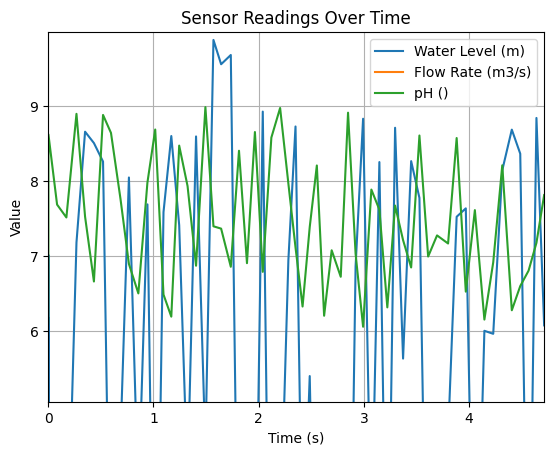

In [27]:
main()